In [2]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [5]:
data_dir = pathlib.Path("/content/drive/MyDrive/TCC_DOCS/images")
print(data_dir)

/content/drive/MyDrive/TCC_DOCS/images


['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborreheic_keratosis', 'squamous_cellcarcinoma']


In [6]:
np.random.seed(1000)

image_shape = 100
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(image_shape,image_shape,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(image_shape,image_shape,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(5))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


# Resumo do modelo
AlexNet.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 25, 25, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 25, 25, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │              

 Total params: 41,454,121 (158.13 MB)

 Trainable params: 41,432,975 (158.05 MB)

 Non-trainable params: 21,146 (82.60 KB)

In [10]:
batch_size= 100

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape, image_shape),
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 47813 files belonging to 5 classes.
Found 47813 files belonging to 5 classes.
Using 9562 files for validation.
Found 47813 files belonging to 5 classes.
['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborreheic_keratosis', 'squamous_cellcarcinoma']


In [11]:
for image_batch, labels_batch in train_ds:
  train_img = image_batch
  train_labels = labels_batch
  break
for image_batch, labels_batch in val_ds:
  val_img = image_batch
  val_labels = labels_batch
  break
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  test_img = image_batch
  test_labels = labels_batch
  break

(100, 100, 100, 3)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE
#AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(image_shape, image_shape, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
AlexNet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [16]:
epochs = 50



history = AlexNet.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
    )

Epoch 1/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 1180s 96ms/step - accuracy: 0.6213 - loss: 1.2696 - val_accuracy: 0.7442 - val_loss: 0.8650
Epoch 2/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7520 - loss: 0.8431 - val_accuracy: 0.3571 - val_loss: 2.1064
Epoch 3/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7638 - loss: 0.7233 - val_accuracy: 0.7607 - val_loss: 0.6991
Epoch 4/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7743 - loss: 0.6503 - val_accuracy: 0.7182 - val_loss: 0.8185
Epoch 5/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7822 - loss: 0.6144 - val_accuracy: 0.7301 - val_loss: 0.8575
Epoch 6/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7934 - loss: 0.5712 - val_accuracy: 0.5216 - val_loss: 1.4549
Epoch 7/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7982 - loss: 0.5473 - val_accuracy: 0.7580 - val_loss: 0.6523
Epoch 8/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8077 - loss: 0.5224 - val_accuracy

In [17]:
loss, acc = AlexNet.evaluate(test_ds)
print("Accuracy", acc)

479/479 ━━━━━━━━━━━━━━━━━━━━ 130s 272ms/step - accuracy: 0.9093 - loss: 0.4120
Accuracy 0.908832311630249


In [18]:
# prompt: imprima a matriz de confusao do modelo treinado

from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for the test set
y_pred = np.argmax(AlexNet.predict(test_ds), axis=1)

# Get true labels for the test set
y_true = []
for images, labels in test_ds:
  y_true.extend(np.argmax(labels.numpy(), axis=1))

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)


479/479 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Confusion Matrix:
[[ 4095   122   458    71    21]
 [  141  5712  1259   100    14]
 [  229   364 31904   112     5]
 [  159   102   523  1109    12]
 [  261    82   282    42   634]]


479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


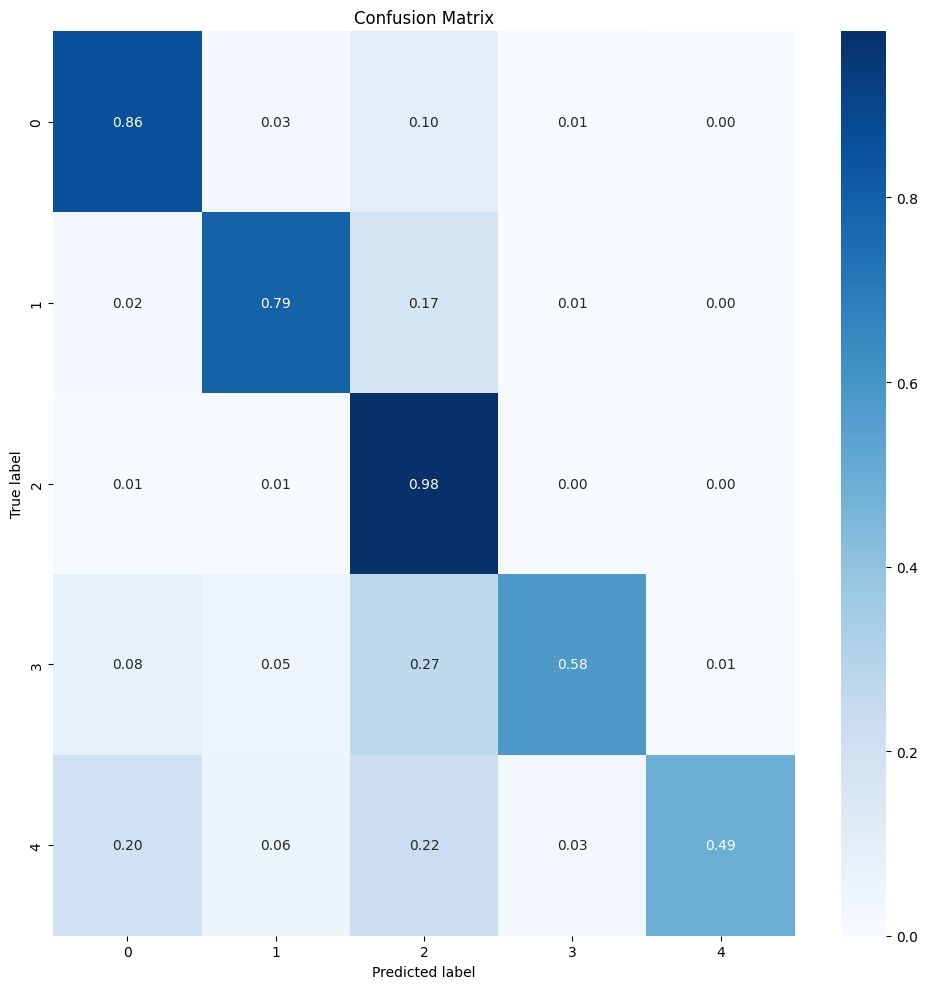

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtenha previsões do conjunto de teste
y_pred = np.argmax(AlexNet.predict(test_ds), axis=1)

# Obtenha os rótulos verdadeiros do conjunto de teste
y_true = []
for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Converta listas para arrays numpy
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calcule a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Normalize a matriz de confusão
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm = np.around(cm_norm, decimals=2)

# Crie um DataFrame para a matriz de confusão
cm_df = pd.DataFrame(cm_norm, index=class_names, columns=class_names)

# Visualize a matriz de confusão
plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues, fmt='.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


Shape of test_labels: (100, 5)
Shape of y_pred: (100,)
